# Creditcard Fraud detection using Machine learningntation

## 1. Problem definition 

> Given data about creditcard application can we can we classify fauduland application or not ? 

## 2. Data

data  source :- https://www.kaggle.com/datasets/mishra5001/credit-card

## 3. Evaluation

> If we can predict with 93% accuracy whether a application is fraud or not, we can call the model a ssuccess

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).



## preparing tools 
we are using pandas, Numpy, Matplotlib for data and manipulation 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# import the sklearn models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#>> 100k sampples
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

# Evaluation models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### load data

In [6]:
application_data = pd.read_csv("dataset/application_data.csv")
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
previous_application = pd.read_csv("dataset/previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
column_desc =  pd.read_csv("dataset/columns_description.csv" , encoding='latin-1')
column_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [9]:
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [10]:
print("Object type values:",np.count_nonzero(application_data.select_dtypes('object').columns))

Object type values: 16


In [11]:
print(application_data.select_dtypes('object').columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [12]:
application_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [13]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [14]:
subset1 = application_data.iloc[:, 0:20]
subset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [15]:
draft1 = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
         'REGION_POPULATION_RELATIVE','DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION',
         'DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
         'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21']

In [16]:
draft1transform = ['NAME_CONTRACT_TYPE',  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                  'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE',]

In [17]:
draft1missing = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',]

In [18]:
# lets handle the missing data of object datatype

misssing = ['NAME_TYPE_SUITE','OCCUPATION_TYPE' ]

In [19]:
application_data['NAME_TYPE_SUITE'] = application_data['NAME_TYPE_SUITE'].fillna(value="Other_B")

In [20]:
application_data['NAME_TYPE_SUITE'].isna().sum()

0

In [21]:
application_data['OCCUPATION_TYPE'].isna().sum()

96391

In [22]:
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].fillna(value="Unknown")

In [23]:
application_data['OCCUPATION_TYPE'].isna().sum()

0

In [24]:
application_data.shape

(307511, 122)

In [25]:
## lets convert the data into x and y 

x = application_data.drop('TARGET', axis = 1)
y= application_data['TARGET']

x.shape

(307511, 121)

In [26]:
x = x.drop('SK_ID_CURR', axis = 1)
x = x.drop('CODE_GENDER', axis = 1)
x = x.drop('HOUR_APPR_PROCESS_START', axis = 1)
x = x.drop('WEEKDAY_APPR_PROCESS_START', axis = 1)

In [27]:
x['EXT_SOURCE_1'].isna().sum() # drop it 2 and 3 also cause they dont have meaning

173378

In [28]:
drop_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [29]:
len(drop_columns)

50

In [30]:
for i in drop_columns:
    x = x.drop(i, axis = 1)
x.shape    

(307511, 67)

In [31]:
missingmean = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in missingmean:
    x[i] = x[i].fillna(value = x[i].mean())
x.isna().sum()    

NAME_CONTRACT_TYPE            0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 67, dtype: int64

In [32]:
x = x.drop('OWN_CAR_AGE', axis=1)

In [33]:
x.shape

(307511, 66)

In [34]:
ss1= x.iloc[:,0:30]
ss1.isna().sum()

NAME_CONTRACT_TYPE               0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS                  2
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
REG_REGION_NOT_LIVE_

In [35]:
ss2= x.iloc[:,29:68]
ss2.isna().sum()

REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_10                  0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_12                  0
FLAG_DOCUMENT_13                  0
FLAG_DOCUMENT_14                  0
FLAG_DOCUMENT_15                  0
FLAG_DOCUMENT_16                  0
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18            

In [36]:
fillmiscol = ['AMT_ANNUITY','AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
              'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

In [37]:
for j in fillmiscol:
    print(x[j].dtype)

float64
float64
float64
float64
float64
float64
float64


In [38]:
x['AMT_ANNUITY'].mean()

27108.573909183444

In [39]:
x['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [40]:
x['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [41]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mean()

1.4052921791901856

In [42]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mean()

0.10004894123788705

In [43]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mean()

1.4222454239942575

In [44]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mean()

0.1434206662533851

In [45]:
x['CNT_FAM_MEMBERS'] = x['CNT_FAM_MEMBERS'].fillna(value = 2.0)

In [46]:
x['DAYS_LAST_PHONE_CHANGE'] = x['DAYS_LAST_PHONE_CHANGE'].fillna(value= -1285.0)
x['OBS_30_CNT_SOCIAL_CIRCLE'] = x['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=1.0)
x['DEF_30_CNT_SOCIAL_CIRCLE'] = x['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=0.0)
x['OBS_60_CNT_SOCIAL_CIRCLE'] = x['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=1.0)
x['DEF_60_CNT_SOCIAL_CIRCLE'] = x['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=0.0)

In [47]:
x['AMT_ANNUITY'] = x['AMT_ANNUITY'].fillna(value =27108.573 )
x['AMT_GOODS_PRICE'] = x['AMT_GOODS_PRICE'].fillna(value = 538396.20)

In [48]:
ss1= x.iloc[:,0:30]
ss1.isna().sum()

NAME_CONTRACT_TYPE             0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
dtype: int

In [49]:
ss2= x.iloc[:,29:68]
ss2.isna().sum()

REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUM

## now we have to convert the object type into float or int 

 we have two ways of doing it 
  * using pandas
  * using Scikit learn

let's try both

**using pandas**

In [50]:
draft1transform

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [51]:
dummies = pd.get_dummies(data=application_data[draft1transform],
                         dtype=float)
dummies

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
xp = x

In [53]:
for i in draft1transform:
    xp = xp.drop(i, axis = 1)
xp.shape   

(307511, 56)

In [54]:
## add both the DataFrame dummies and cp 
merged_df = pd.concat([xp, dummies], axis=1)
merged_df

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Using SKlearn**

In [55]:
x

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307507,Cash loans,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307508,Cash loans,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,...,0,0,0,0,1.000000,0.000,0.000000,1.000000,0.000000,1.000000
307509,Cash loans,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [56]:
# now that our object datatype column does not have any missing values lets convert them into string

draft1transform = ['NAME_CONTRACT_TYPE',  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                  'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE',]

# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  draft1transform)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged) 

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_X = transformer.fit_transform(x)
transformed_X

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 2., 0., 1.]])

In [57]:
x.iloc[0]

NAME_CONTRACT_TYPE            Cash loans
FLAG_OWN_CAR                           N
FLAG_OWN_REALTY                        Y
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                202500.0
                                 ...    
AMT_REQ_CREDIT_BUREAU_DAY            0.0
AMT_REQ_CREDIT_BUREAU_WEEK           0.0
AMT_REQ_CREDIT_BUREAU_MON            0.0
AMT_REQ_CREDIT_BUREAU_QRT            0.0
AMT_REQ_CREDIT_BUREAU_YEAR           1.0
Name: 0, Length: 66, dtype: object

In [58]:
transformed_X[0]

array([ 1.000000e+00,  0.000000e+00,  1.000000e+00,  0.000000e+00,
        0.000000e+00,  1.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  1.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  1.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  1.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  1.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e

In [59]:
columname = x.columns

In [60]:
print(columname)

Index(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DO

In [61]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [62]:
# we have x and y now lets split into train and test

np.random.seed(47)

# Create train and test splits with transformed_X
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)



In [63]:
X_train.shape

(246008, 171)

In [64]:
y_train.shape

(246008,)

In [65]:
X_test.shape

(61503, 171)

In [66]:
y_test.shape

(61503,)

In [67]:
models = {"Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
         "SGD": SGDClassifier() }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}

    model_eval = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [68]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\borka\TEproject\CreditcardFD\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.918215371607889,
 'Random Forest': 0.9182478903468123,
 'SGD': 0.9144431978927857}

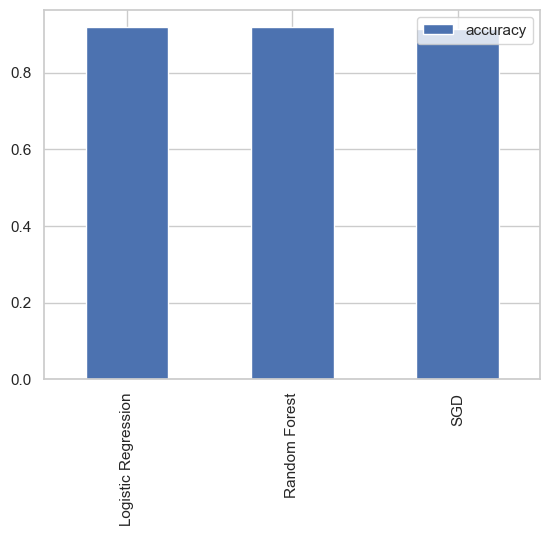

In [69]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [59]:
 np.random.seed(88)

mod1 = LogisticRegression(max_iter=300)
mod2 =  RandomForestClassifier()
mod3 =  SGDClassifier()

mod1.fit(X_train, y_train) 
mod2.fit(X_train, y_train) 
mod3.fit(X_train, y_train) 

ypred1  = mod1.predict(X_test)
ypred2  = mod2.predict(X_test)
ypred3  = mod3.predict(X_test)





C:\Users\borka\TEproject\CreditcardFD\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import svm
clf1 = svm.SVC()

clf1.fit(X_train, y_train)

y_preds = clf1.predict(X_test)



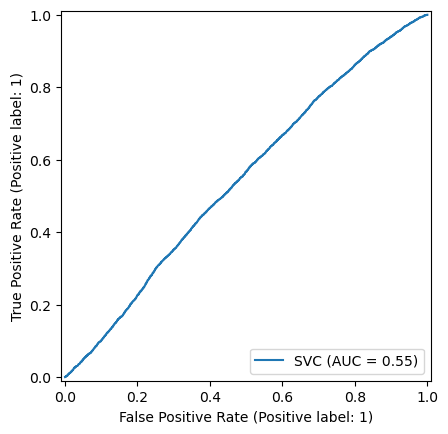

In [61]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=clf1, 
                               X=X_test, 
                               y=y_test); 

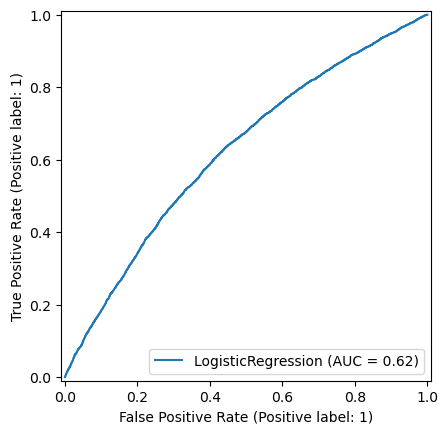

In [62]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=mod1, 
                               X=X_test, 
                               y=y_test); 

In [63]:
print(confusion_matrix(y_test, ypred1))

[[56473     1]
 [ 5029     0]]


In [64]:
print(confusion_matrix(y_test, ypred2))

[[56474     0]
 [ 5028     1]]


In [65]:
print(confusion_matrix(y_test, ypred3))

[[55227  1247]
 [ 4935    94]]


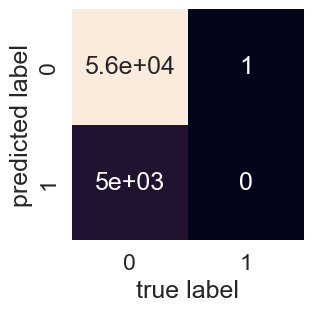

In [66]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, ypred1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [67]:
# Show classification report
print(classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56474
           1       0.00      0.00      0.00      5029

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.84      0.92      0.88     61503



In [68]:
print(classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56474
           1       1.00      0.00      0.00      5029

    accuracy                           0.92     61503
   macro avg       0.96      0.50      0.48     61503
weighted avg       0.92      0.92      0.88     61503



In [69]:
print(classification_report(y_test, ypred3))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56474
           1       0.07      0.02      0.03      5029

    accuracy                           0.90     61503
   macro avg       0.49      0.50      0.49     61503
weighted avg       0.85      0.90      0.87     61503



In [70]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(mod1,
                         transformed_X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # accuracy as scoring
cv_acc

NameError: name 'mod1' is not defined

In [ ]:
cv1_acc = cross_val_score(mod2,
                         transformed_X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # accuracy as scoring
cv1_acc

In [ ]:
cv_acc2 = cross_val_score(mod3,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # accuracy as scoring
cv_acc2

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

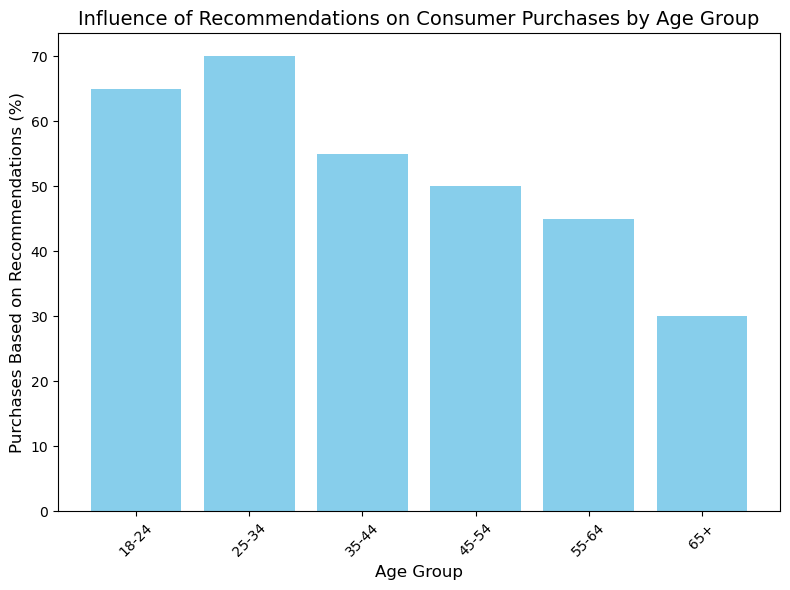

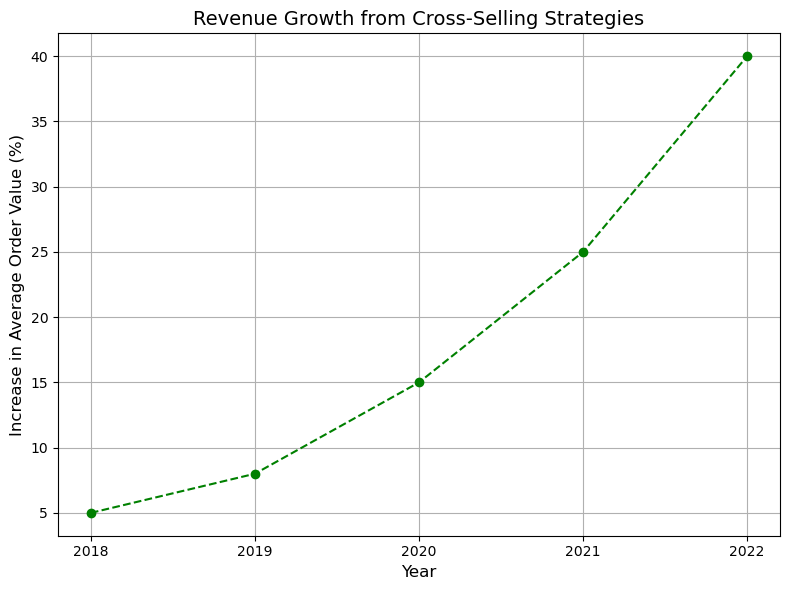

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a fake dataframe for "Revenue Growth from Cross-Selling Strategies"
data = {
    'Year': ['2018', '2019', '2020', '2021', '2022'],
    'Average Order Value (%)': [5, 8, 15, 25, 40]  # Example growth in percentage over the years
}

# Creating a dataframe
df = pd.DataFrame(data)

# Plotting the line graph
plt.figure(figsize=(8, 6))
plt.plot(df['Year'], df['Average Order Value (%)'], marker='o', color='green', linestyle='--')
plt.title('Revenue Growth from Cross-Selling Strategies', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Increase in Average Order Value (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('revenue_growth_cross_selling.png')

# Show the plot
plt.show()


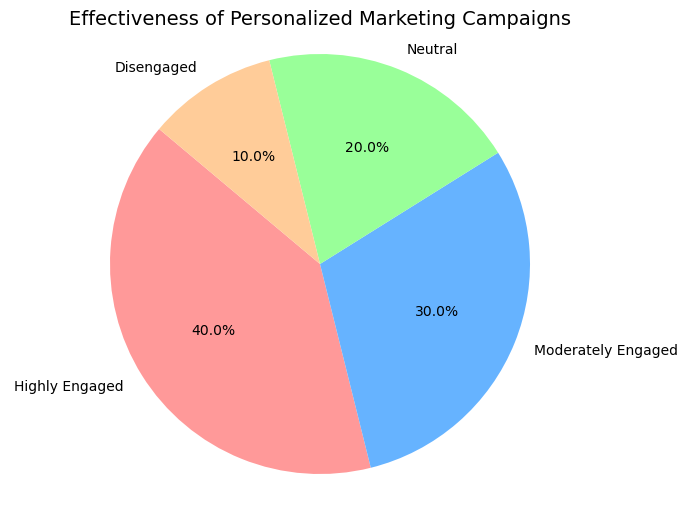

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a fake dataframe for "Effectiveness of Personalized Marketing Campaigns"
data = {
    'Engagement Level': ['Highly Engaged', 'Moderately Engaged', 'Neutral', 'Disengaged'],
    'Percentage': [40, 30, 20, 10]  # Example engagement levels in percentage
}

# Creating a dataframe
df = pd.DataFrame(data)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(df['Percentage'], labels=df['Engagement Level'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Effectiveness of Personalized Marketing Campaigns', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Save the plot as a PNG file
plt.savefig('personalized_marketing_effectiveness.png')

# Show the plot
plt.show()


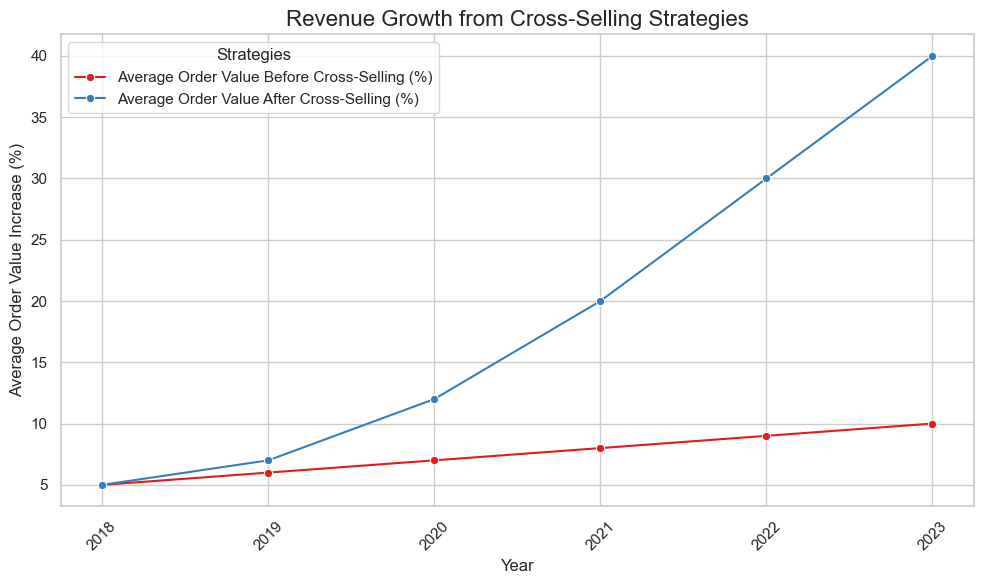

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of seaborn
sns.set(style="whitegrid")

# Creating a more detailed fake dataframe for "Revenue Growth from Cross-Selling Strategies"
data = {
    'Year': ['2018', '2019', '2020', '2021', '2022', '2023'],
    'Average Order Value Before Cross-Selling (%)': [5, 6, 7, 8, 9, 10],
    'Average Order Value After Cross-Selling (%)': [5, 7, 12, 20, 30, 40]
}

# Creating a dataframe
df = pd.DataFrame(data)

# Melting the dataframe for easier plotting with seaborn
df_melted = df.melt(id_vars='Year', var_name='Strategy', value_name='Average Order Value (%)')

# Plotting the line graph using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Year', y='Average Order Value (%)', hue='Strategy', marker='o', palette='Set1')

# Adding titles and labels
plt.title('Revenue Growth from Cross-Selling Strategies', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Order Value Increase (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Strategies')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('improved_revenue_growth_cross_selling.png')

# Show the plot
plt.show()
